In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [128]:
# Check if there are any non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [129]:
# Drop the null values and save it into the original data frame.
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [130]:
from sklearn.model_selection import train_test_split

# Let 'X' be the data frame without the target variable.
X = data.drop(['median_house_value'], axis=1)
# Let 'y' be the data frame with only the target variable.
y = data['median_house_value']

# Split the data into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [131]:
# Join the train data for exploration.
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9721,-121.68,36.90,13.0,833.0,130.0,405.0,127.0,5.2729,<1H OCEAN,322900.0
18432,-121.85,37.26,16.0,2312.0,303.0,1158.0,295.0,7.4323,<1H OCEAN,311800.0
13324,-117.64,34.06,50.0,637.0,143.0,590.0,147.0,1.9659,INLAND,85700.0
17452,-120.47,34.70,24.0,2387.0,385.0,1051.0,382.0,4.4595,NEAR OCEAN,152700.0
7049,-118.04,33.93,36.0,1045.0,239.0,1165.0,230.0,3.1979,<1H OCEAN,161800.0
...,...,...,...,...,...,...,...,...,...,...
266,-122.19,37.77,52.0,2170.0,428.0,1086.0,425.0,3.3715,NEAR BAY,143900.0
19698,-121.62,39.11,11.0,3519.0,577.0,1459.0,549.0,4.2792,INLAND,123800.0
19943,-119.36,36.22,10.0,2445.0,526.0,1262.0,476.0,1.9355,INLAND,68300.0
10348,-117.66,33.60,24.0,1684.0,232.0,781.0,230.0,6.8667,<1H OCEAN,279600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

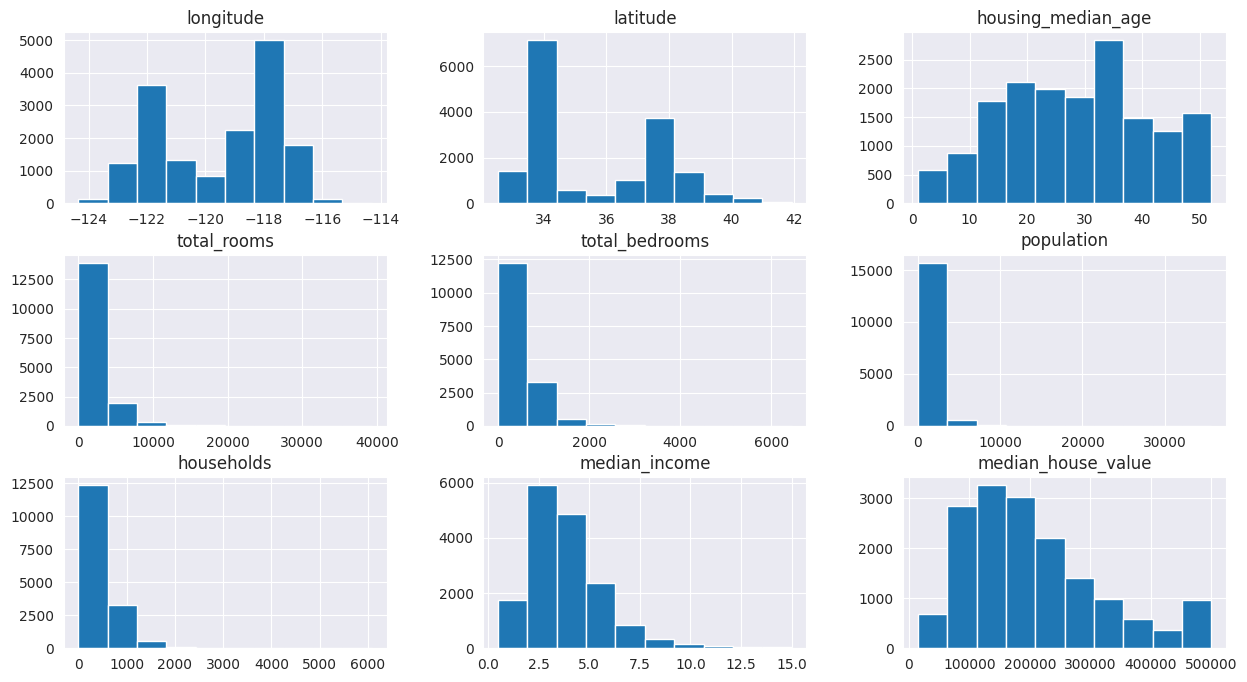

In [132]:
# Draw a histogram to show comparison
train_data.hist(figsize=(15, 8))

In [133]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

In [134]:
# Get dummy variables for ocean proximity.
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9721,-121.68,36.90,13.0,6.726233,4.875197,6.006353,4.852030,5.2729,322900.0,True,False,False,False,False
18432,-121.85,37.26,16.0,7.746301,5.717028,7.055313,5.690359,7.4323,311800.0,True,False,False,False,False
13324,-117.64,34.06,50.0,6.458338,4.969813,6.381816,4.997212,1.9659,85700.0,False,True,False,False,False
17452,-120.47,34.70,24.0,7.778211,5.955837,6.958448,5.948035,4.4595,152700.0,False,False,False,False,True
7049,-118.04,33.93,36.0,6.952729,5.480639,7.061334,5.442418,3.1979,161800.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,-122.19,37.77,52.0,7.682943,6.061457,6.991177,6.054439,3.3715,143900.0,False,False,False,True,False
19698,-121.62,39.11,11.0,8.166216,6.359574,7.286192,6.309918,4.2792,123800.0,False,True,False,False,False
19943,-119.36,36.22,10.0,7.802209,6.267201,7.141245,6.167516,1.9355,68300.0,False,True,False,False,False
10348,-117.66,33.60,24.0,7.429521,5.451038,6.661855,5.442418,6.8667,279600.0,True,False,False,False,False


<Axes: >

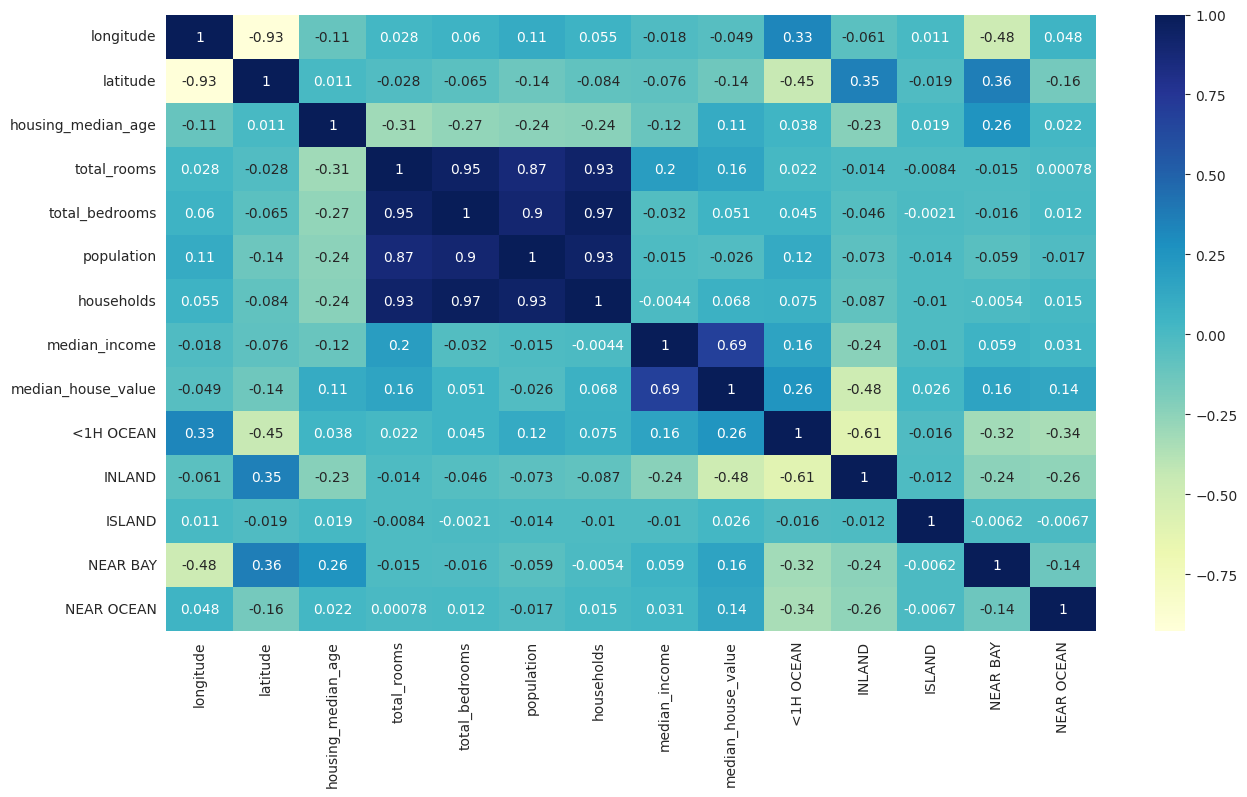

In [135]:
# Draw heatmap to see the dependence of one factor on another.
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

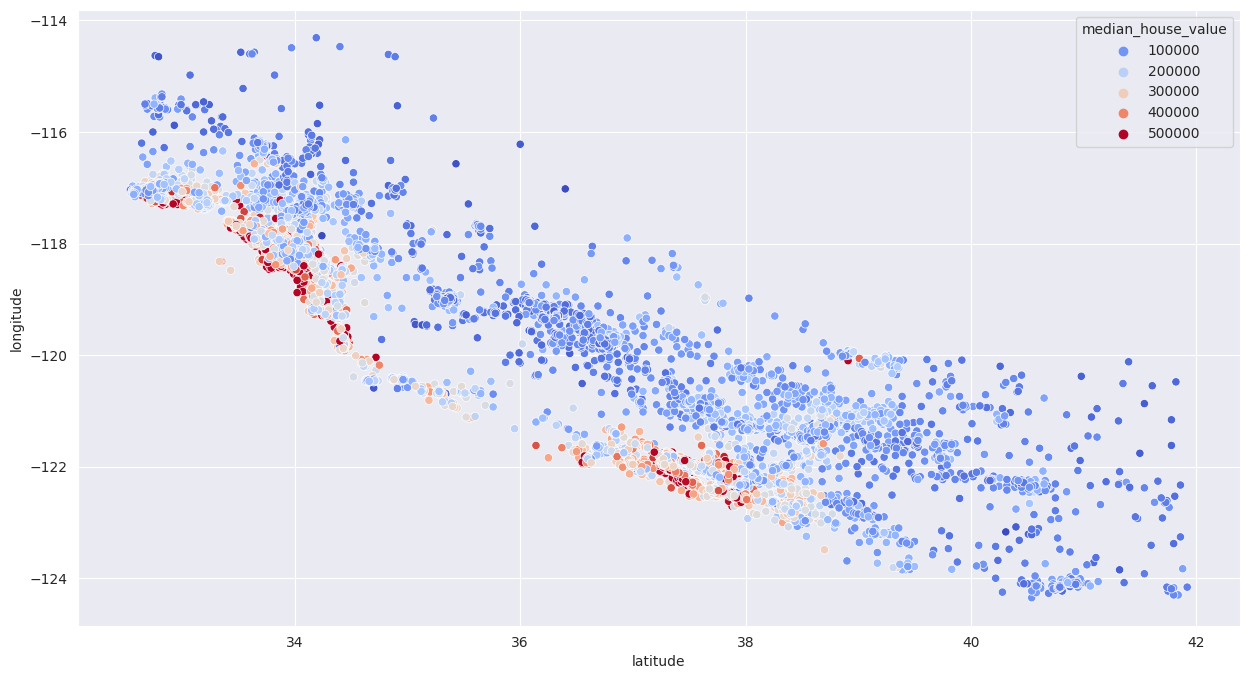

In [136]:
# Below scatter plot shows the difference in prices according to the latitude and longitude.
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [137]:
# We can use feature engineering to combine fields to form a more meaningful factor.
# Number of bedrooms per rooms.
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
# Number of rooms per household
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

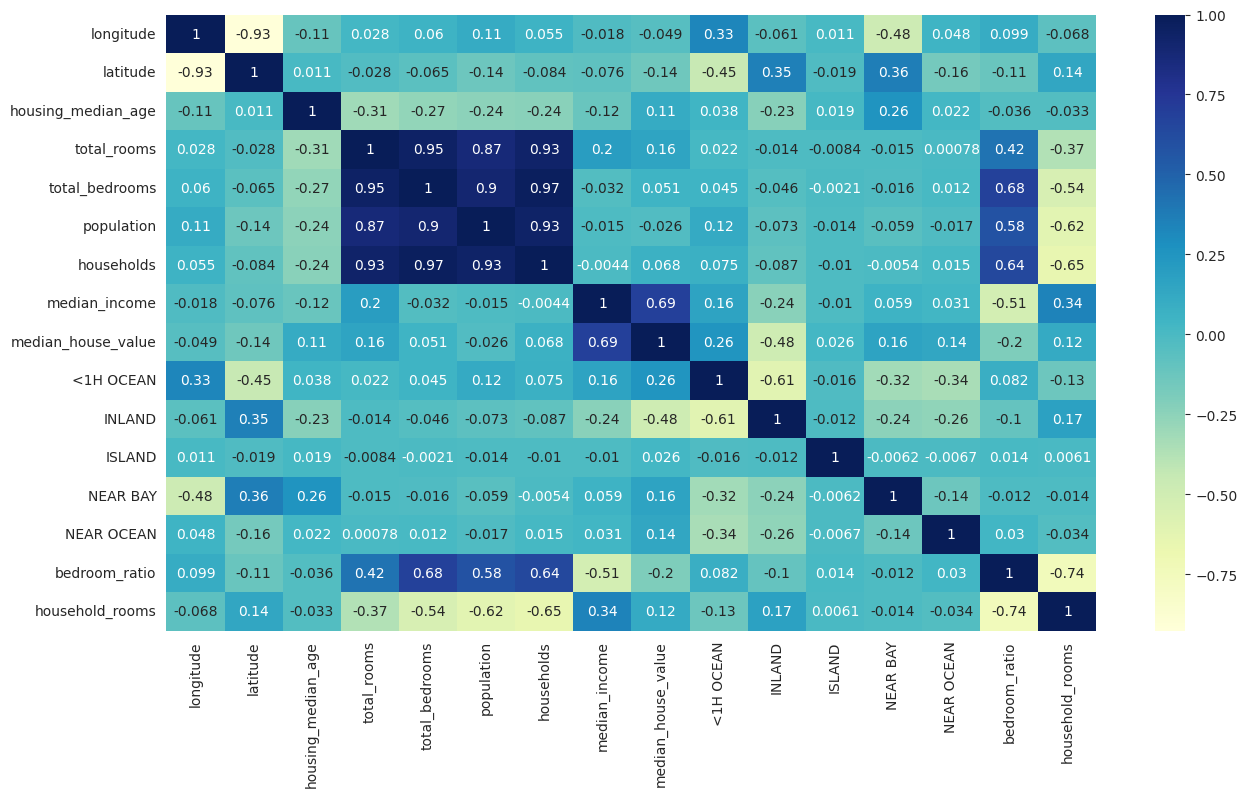

In [138]:
# Drawing heatmap to see the dependence of newly added features on house price.
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [139]:
from sklearn.linear_model import LinearRegression

# Crating a Linear Regression object.
reg = LinearRegression()

# Dropping the ISLAND column as it does not make any significance.
# Split the 'train_data' into X and Y.
X_train, y_train = train_data.drop(['median_house_value', 'ISLAND'], axis=1), train_data['median_house_value']

# Train the model.
reg.fit(X_train, y_train)

LinearRegression()

In [140]:
# Setting up the test dataset accordingly.
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

# Number of bedrooms per rooms.
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
# Number of rooms per household
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [141]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [142]:
# Check the accuracy of the model using the test dataset.
reg.score(X_test, y_test)

0.6751815377054686

In [143]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
9721,-121.68,36.90,13.0,6.726233,4.875197,6.006353,4.852030,5.2729,True,False,False,False,0.724803,1.386272
18432,-121.85,37.26,16.0,7.746301,5.717028,7.055313,5.690359,7.4323,True,False,False,False,0.738033,1.361303
13324,-117.64,34.06,50.0,6.458338,4.969813,6.381816,4.997212,1.9659,False,True,False,False,0.769519,1.292388
17452,-120.47,34.70,24.0,7.778211,5.955837,6.958448,5.948035,4.4595,False,False,False,True,0.765708,1.307694
7049,-118.04,33.93,36.0,6.952729,5.480639,7.061334,5.442418,3.1979,True,False,False,False,0.788272,1.277507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,-122.19,37.77,52.0,7.682943,6.061457,6.991177,6.054439,3.3715,False,False,True,False,0.788950,1.268977
19698,-121.62,39.11,11.0,8.166216,6.359574,7.286192,6.309918,4.2792,False,True,False,False,0.778766,1.294187
19943,-119.36,36.22,10.0,7.802209,6.267201,7.141245,6.167516,1.9355,False,True,False,False,0.803260,1.265049
10348,-117.66,33.60,24.0,7.429521,5.451038,6.661855,5.442418,6.8667,True,False,False,False,0.733700,1.365114


In [145]:
reg.predict([[-121.68, 36.90, 13.0, 7, 4, 6, 4, 5, True, False, False, False, 0.72, 1.38]])

/home/loophole/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([69933.27213461])